# This is a simple example of how to load and plot the provided data.

In [45]:
!nvidia-smi

Sat May 24 02:31:09 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.161.08             Driver Version: 535.161.08   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2070        Off | 00000000:09:00.0 Off |                  N/A |
| 29%   34C    P8               6W / 175W |    139MiB /  8192MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [27]:
import zarr
import xarray as xr
import matplotlib.pyplot as plt

In [28]:
# Load the data (update the path to the correct location)
data_path = "../data/processed_data_cse151b_v2_corrupted_ssp245/processed_data_cse151b_v2_corrupted_ssp245.zarr"
data = xr.open_zarr(data_path)
data

<xarray.Dataset> Size: 621MB
Dimensions:    (ssp: 4, time: 1021, latitude: 48, longitude: 72, x: 72, y: 48,
                member_id: 3)
Coordinates:
    lat        (x, y) float64 28kB dask.array<chunksize=(72, 48), meta=np.ndarray>
  * latitude   (latitude) float64 384B -89.05 -85.26 -81.47 ... 85.26 89.05
    lon        (x, y) float64 28kB dask.array<chunksize=(72, 48), meta=np.ndarray>
  * longitude  (longitude) float64 576B 1.25 6.25 11.25 ... 346.2 351.2 356.2
  * member_id  (member_id) int64 24B 0 1 2
  * ssp        (ssp) <U6 96B 'ssp126' 'ssp245' 'ssp370' 'ssp585'
  * time       (time) object 8kB 2015-01-15 00:00:00 ... 2100-01-15 00:00:00
  * x          (x) float64 576B 1.875 6.875 11.88 16.88 ... 346.9 351.9 356.9
  * y          (y) float64 384B -88.59 -84.82 -81.05 ... 81.05 84.82 88.59
Data variables:
    BC         (ssp, time, latitude, longitude) float64 113MB dask.array<chunksize=(1, 24, 48, 72), meta=np.ndarray>
    CH4        (ssp, time) float64 33kB dask.array<chunksize=(1, 24), meta=np.ndarray>
    CO2        (ssp, time) float64 33kB dask.array<chunksize=(1, 24), meta=np.ndarray>
    SO2        (ssp, time, latitude, longitude) float64 113MB dask.array<chunksize=(1, 24, 48, 72), meta=np.ndarray>
    pr         (ssp, time, member_id, y, x) float32 169MB dask.array<chunksize=(1, 24, 1, 48, 72), meta=np.ndarray>
    rsdt       (ssp, time, y, x) float32 56MB dask.array<chunksize=(1, 24, 48, 72), meta=np.ndarray>
    tas        (ssp, time, member_id, y, x) float32 169MB dask.array<chunksize=(1, 24, 1, 48, 72), meta=np.ndarray>
Attributes:
    original_member_ids:  ['r10i1p1f1', 'r11i1p1f1', 'r4i1p1f1']
    precipitation_units:  mm/day (converted from kg m-2 s-1)
    source:               CMIP6 data processed for CSE151B
    ssp:                  ssp126

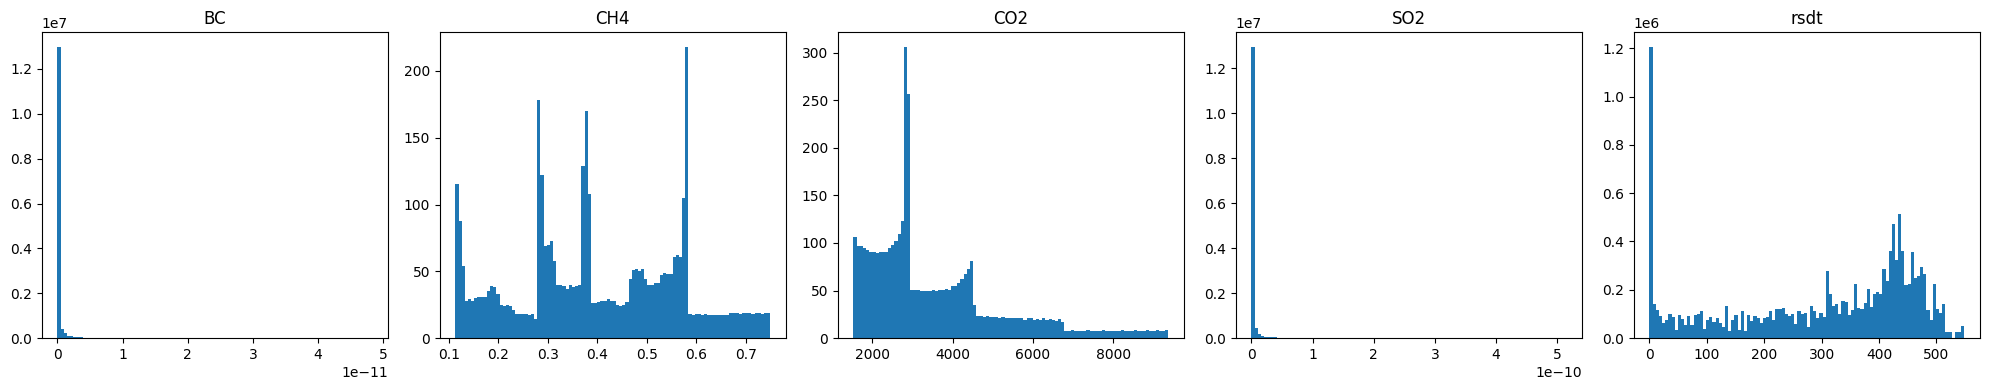

In [31]:
import matplotlib.pyplot as plt

variables = ['BC', 'CH4', 'CO2', 'SO2', 'rsdt']
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))

for ax, var in zip(axes, variables):
    data[var].plot.hist(ax=ax, bins=100)
    ax.set_title(var)
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()


In [34]:
input_vars = ['BC', 'CH4', 'CO2', 'SO2', 'rsdt']

for var in input_vars:
    var_data = data[var]
    mean_val = var_data.mean().compute().item()
    std_val = var_data.std().compute().item()
    min_val = var_data.min().compute().item()
    max_val = var_data.max().compute().item()
    print(f"{var}: Mean = {mean_val:.4f}, Std = {std_val:.4f}, Min = {min_val:.4f}, Max = {max_val:.4f}")


BC: Mean = 0.0000, Std = 0.0000, Min = -0.0000, Max = 0.0000
CH4: Mean = 0.4028, Std = 0.1652, Min = 0.1136, Max = 0.7496
CO2: Mean = 3562.9982, Std = 1683.4496, Min = 1536.0722, Max = 9362.5935
SO2: Mean = 0.0000, Std = 0.0000, Min = -0.0000, Max = 0.0000
rsdt: Mean = 297.6541, Std = 164.0909, Min = 0.0000, Max = 548.4672


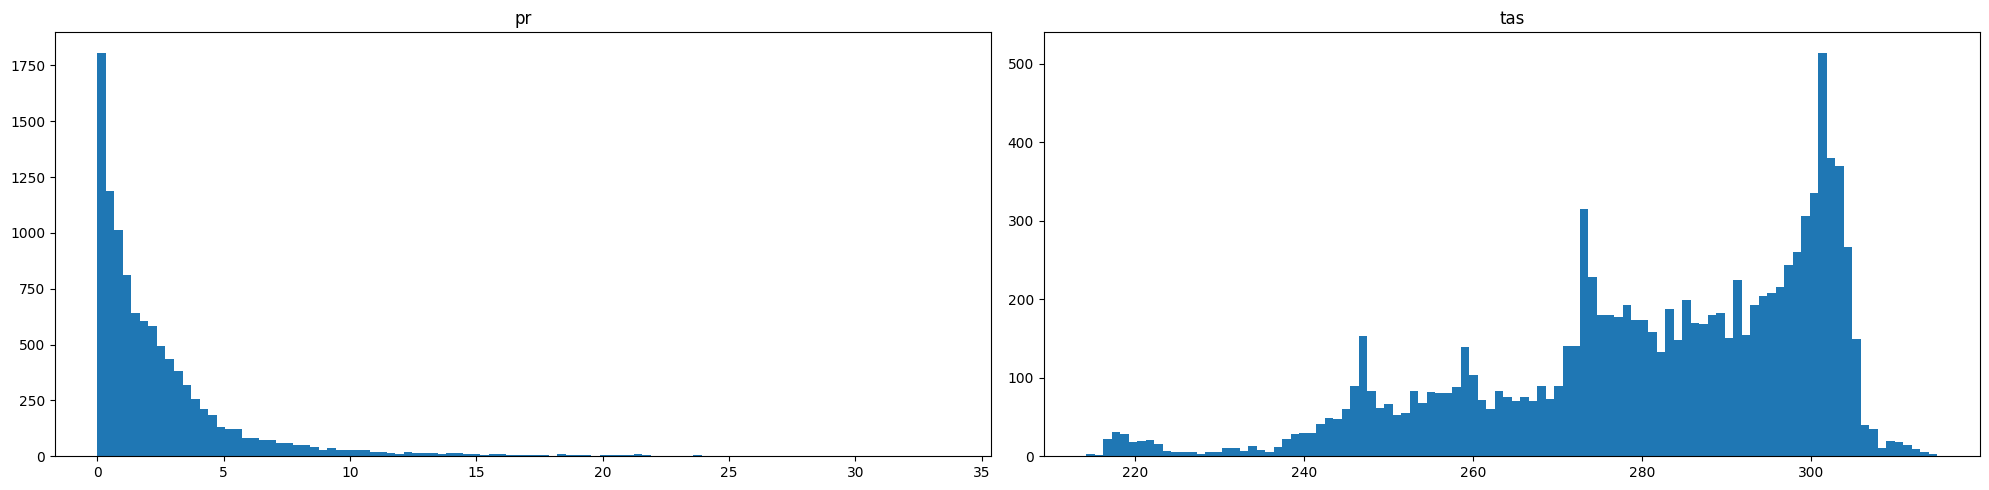

In [24]:
variables = ['pr', 'tas']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

for ax, var in zip(axes, variables):
    data[var].plot.hist(ax=ax, bins=100)
    ax.set_title(var)
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.savefig("output_dist.png", dpi=300)
plt.show()

In [42]:
# Check dims and coords
print(data.dims)
print(data.coords)

# Extract year
data = data.assign_coords(year=data['time'].dt.year)

# Group and reduce
input_vars = ['BC', 'CH4', 'CO2', 'SO2', 'rsdt']
grouped_means = data[input_vars].groupby(['ssp', 'time']).mean(dim=['latitude', 'longitude'])

print(grouped_means)


FrozenMappingWarningOnValuesAccess({'ssp': 4, 'time': 1021, 'latitude': 48, 'longitude': 72, 'x': 72, 'y': 48, 'member_id': 3})
Coordinates:
    lat        (x, y) float64 28kB dask.array<chunksize=(72, 48), meta=np.ndarray>
  * latitude   (latitude) float64 384B -89.05 -85.26 -81.47 ... 85.26 89.05
    lon        (x, y) float64 28kB dask.array<chunksize=(72, 48), meta=np.ndarray>
  * longitude  (longitude) float64 576B 1.25 6.25 11.25 ... 346.2 351.2 356.2
  * member_id  (member_id) int64 24B 0 1 2
  * ssp        (ssp) <U6 96B 'ssp126' 'ssp245' 'ssp370' 'ssp585'
  * time       (time) object 8kB 2015-01-15 00:00:00 ... 2100-01-15 00:00:00
  * x          (x) float64 576B 1.875 6.875 11.88 16.88 ... 346.9 351.9 356.9
  * y          (y) float64 384B -88.59 -84.82 -81.05 ... 81.05 84.82 88.59
    year       (time) int64 8kB 2015 2015 2015 2015 2015 ... 2099 2099 2099 2100
<xarray.Dataset> Size: 57MB
Dimensions:  (ssp: 4, time: 1021, y: 48, x: 72)
Coordinates:
  * ssp      (ssp) <U6 96B 'ssp

In [44]:
grouped_means.S02

AttributeError: 'Dataset' object has no attribute 'S02'

## Plot a few snapshots of temperature and precipitation (first, middle, and last)

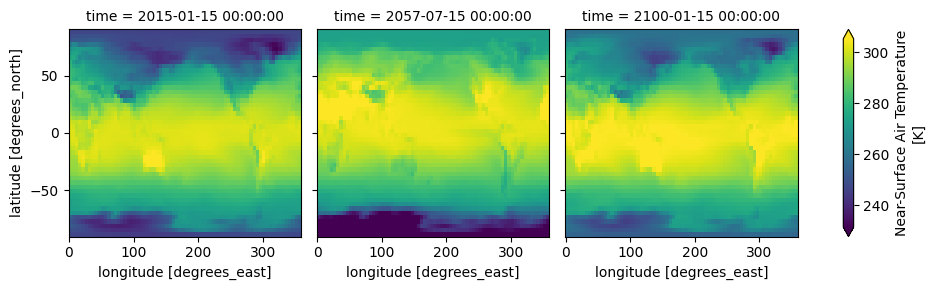

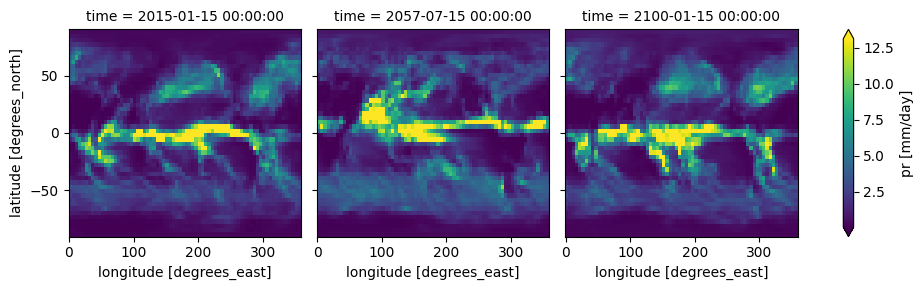

In [3]:
data_subset = data.isel(time=[0, data.time.size // 2, -1]).sel(ssp="ssp370", member_id=0)
data_subset.tas.plot(col="time", x="x", y="y", robust=True)
data_subset.pr.plot(col="time", x="x", y="y", robust=True)

# Plot the time series of global mean temperature and precipitation

Note that we do not plot the SSP245 scenario here, as it is corrupted in the provided data.

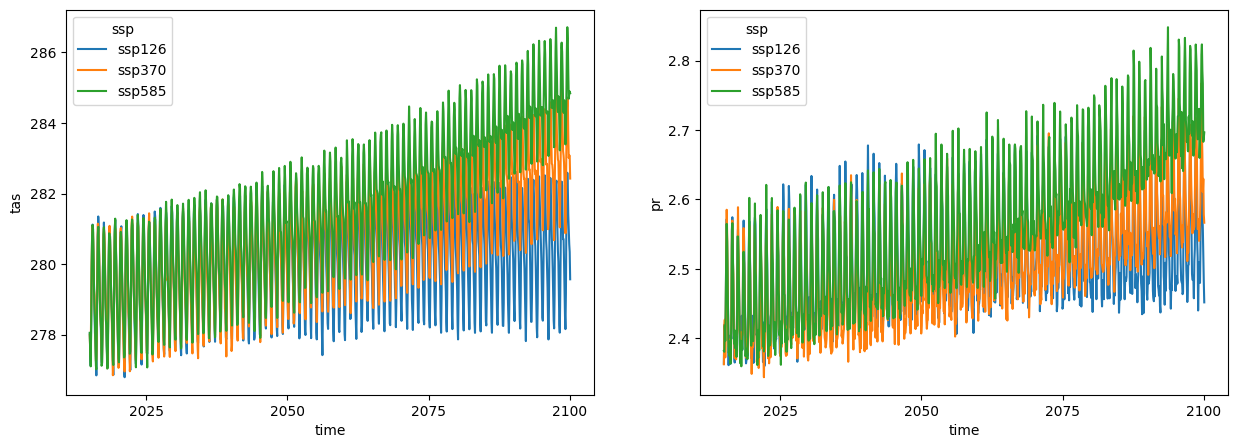

In [4]:
global_mean_data = data.sel(ssp=["ssp126", "ssp370", "ssp585"]).mean(dim=["x", "y", "member_id"])  # also average over all ensemble members
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
global_mean_data.tas.plot(label="Temperature", ax=ax[0], hue="ssp")
global_mean_data.pr.plot(label="Precipitation", ax=ax[1], hue="ssp")# Plot the time series of global mean temperature and precipitation

# Plot the (global mean) time series of climate forcings

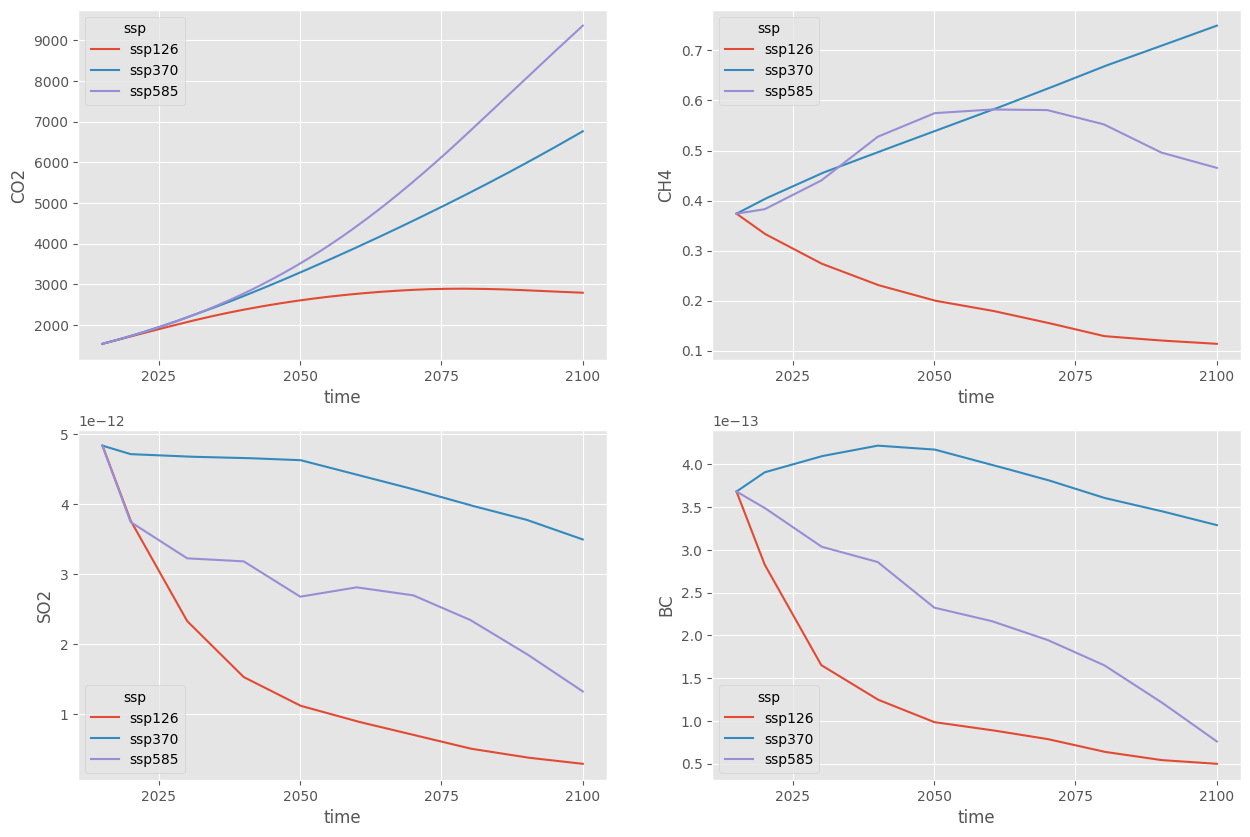

In [13]:
global_mean_data = data.sel(ssp=["ssp126", "ssp370", "ssp585"]).mean(dim=["longitude", "latitude", "member_id"]) 
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
global_mean_data.CO2.plot(ax=axes[0], hue="ssp")
global_mean_data.CH4.plot(ax=axes[1], hue="ssp")
global_mean_data.SO2.plot(ax=axes[2], hue="ssp")
_ = global_mean_data.BC.plot(ax=axes[3], hue="ssp")